# PCA 範例

(Optional) 若尚未安裝相關套件，執行下一行，然後 restart kernel

In [1]:
!pip3 install --user sklearn
!pip3 install --user --upgrade matplotlib

'pip3' 不是內部或外部命令、可執行的程式或批次檔。
'pip3' 不是內部或外部命令、可執行的程式或批次檔。


載入套件

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

載入 iris 資料集

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

設定 模型 估計參數

In [4]:
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

資料建模 並 視覺化 結果

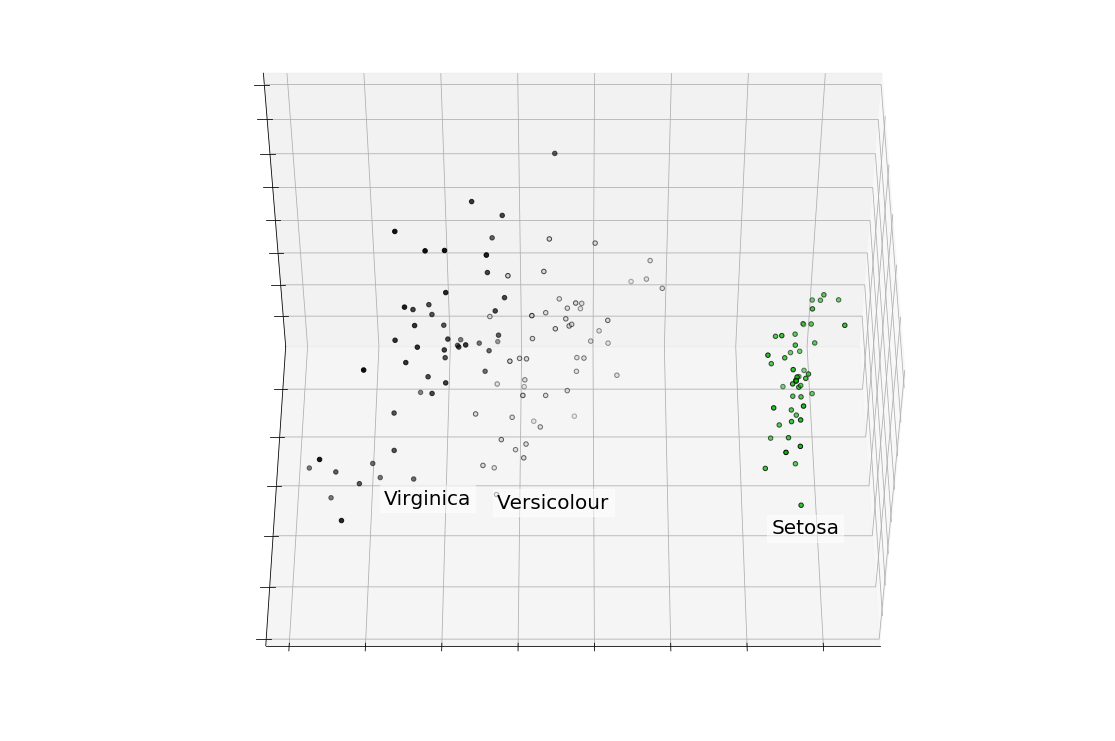

In [5]:
pca.fit(X)
X_t = pca.transform(X)

fig = plt.figure(1, figsize=(16, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=90)
plt.cla()


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_t[y == label, 0].mean(),
              X_t[y == label, 1].mean() + 1.5,
              X_t[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),fontsize=20)
# Reorder the labels to have colors matching the cluster results
y_f = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X_t[:, 0], X_t[:, 1], X_t[:, 2], c=y_f, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()